<a href="https://colab.research.google.com/github/shelfertmurphy/FromScratchML/blob/main/RandomMatrixMult.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Matrix Multiplication

Multiplying two nxn matrices requires the multiplication of $n^2$ matrix entries. This process uses a great amount of computing power and time ($O(n^3)$ time efficiency when using a brute-force algorithm). When working with big data, we typically encounter very large matrices, and so randomized matrix multiplication introduces a way to increase efficiency with an approximation of the product. To approximate the product $AB,$ the idea is to randomly sample columns of $A$ and corresponding rows of $B$
to compute an approximation of the product. 

Given distribution {pⱼ} with *n* probabilities, the estimated mean is calculated by taking the sum of all *n* possible outputs weighted by their probabilities. The variance is calculated by taking the weighted average of the squared distances from outputs to mean, meaning we add all (outputs - mean)^2 weighted by their probabilities.

The optimal probability distribution is "norm-squared" sampling to minimize the variance. This is calculated by $p_j = \frac{1}{C} ||$column$ j $of $A|| ||$row$ j $of $B|| = \frac{||a_j|| ||b_j^T||}{C}$ where $C=\sum_{j=1}^n||a_j|| ||b_j^T||.$


In [ ]:
#input a A mxn matrix, B a nxp matrix, a number c, and a list of probabilities indexed from 1 to n
#outputs C and R
#for t from 1 to c:
#pick a number i from 1 to n with weight p_i
#then set the t-th column from C to be the ith column from A divided by the square root of c*p_i
#and set the t-th row from R to be the ith row from B divided by the square root of c*p_i

import numpy as np
import random as rd
from timeit import default_timer as timer
import matplotlib.pyplot as plt

def rand_mat_mul(A, B, c, prob):
  m,n = np.shape(A)
  p = B.shape[1]
  C = np.zeros([m, n])
  R = np.zeros([n, p])
  for t in range(c):
    idx = rd.choices(list(range(0,n)), prob)
    C[:,[t]] = np.divide(A[:,idx], (c*prob[idx]))
    R[t,:] = np.divide(B[[idx],:], (c*prob[idx]))
  return np.matmul(C,R)



#norm-squared function for optimal prob
def optimal_prob(A, B):
  n = A.shape[1]
  product = np.zeros(n)
  for j in range(n):
    product[j] = np.linalg.norm(A[:,j])*np.linalg.norm(B[j,:])
  summation = sum(product)
  return np.divide(product, summation)

#trials
mat1 = np.random.rand(5,5)
mat2 = np.random.rand(5,5)
uniform_probs = np.array([0.2, 0.2, 0.2, 0.2, 0.2])
optimal_probs = optimal_prob(mat1, mat2)

#print actual product
print(np.matmul(mat1,mat2))
#print uniform
print(rand_mat_mul(mat1, mat2, 4, uniform_probs))
#print optimal
print(rand_mat_mul(mat1, mat2, 4, optimal_probs))

[[1.18262244 2.13518558 0.80846443 1.39123924 1.50195457]
 [1.28890871 1.92286879 0.6274426  0.96188372 1.30609405]
 [1.59275701 2.58298804 0.92305589 1.60865964 2.05903462]
 [1.34170857 2.12317206 0.79040027 1.26456759 1.7345237 ]
 [1.56443224 2.70971415 1.25220595 2.01448486 2.23450688]]
[[0.24122104 0.92337423 0.72385209 1.8144171  1.26534357]
 [0.24828295 0.95040664 0.74504336 1.86753541 1.30238737]
 [0.30215223 1.1566138  0.9066934  2.27272952 1.58496284]
 [0.10341755 0.39587386 0.31033368 0.77788646 0.54248476]
 [0.56407216 2.15922167 1.69265838 4.24283959 2.95888403]]
[[1.64684411 2.90585717 0.96090888 1.69080253 1.41797904]
 [1.79875046 3.05283948 1.02201702 1.76504676 1.62812311]
 [1.80816514 3.07726157 1.10331601 1.97387501 1.84912404]
 [1.30182416 2.01280539 0.62079606 0.95045402 1.08883442]
 [1.85340934 3.50287357 1.51289363 3.05138593 2.55832372]]


We can see from above that the product with the optimal probability distribution is closer to the true product.


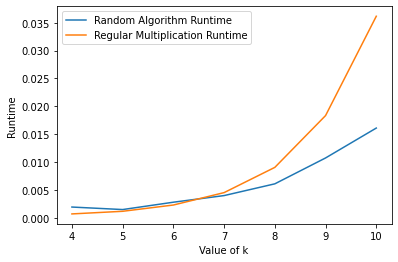

In [ ]:
#regular matrix multiplication function
def mat_mul(A, B):
  for i in range(len(A)):
    # iterating by column by B
    for j in range(len(B[0])):
      # iterating by rows of B
      for k in range(len(B)):
        result[i][j] += A[i][k] * B[k][j]
  return result

#runtime trials for uniform rand
time_rand = []
for k in range(7):
  pwr = k+4
  start = timer()
  mat1 = np.random.rand(5,2**pwr)
  mat2 = np.random.rand(2**pwr,5)
  optimal_probs = optimal_prob(mat1, mat2)
  result = rand_mat_mul(mat1, mat2, 10, optimal_probs)
  end = timer()
  time = end-start
  time_rand.append(time)

#runtime trials for regular matrix multiplication

time_reg = []
for k2 in range(7):
  pwr2 = k2+4
  start2 = timer()
  mat1 = np.random.rand(5,2**pwr2)
  mat2 = np.random.rand(2**pwr2,5)
  result1 = mat_mul(mat1, mat2)
  end2 = timer()
  time2 = end2-start2
  time_reg.append(time2)

#plot results
k_values = [4,5,6,7,8,9,10]
plt.plot(k_values, time_rand, label = "Random Algorithm Runtime")
plt.plot(k_values, time_reg, label = "Regular Multiplication Runtime")
plt.xlabel("Value of k")
plt.ylabel("Runtime")
plt.legend()
plt.show()



Clearly, the runtime for regular matrix multiplication is at first faster, but then around a power of 7 the runtime for regular matrix multiplication increases rapidly in comparison to the random algorithm. Of course, this is just tested when random sampling is constantly sampling 10 rows and columns of the matrices. This will likely change as the sample size changes.

